In [2]:
import xgboost as xgb

C:\Users\Varun\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train=pd.read_csv('C:/Users/Varun/Desktop/kaggle projects/Quora/train.csv')

In [5]:
test=pd.read_csv('test.csv')

In [6]:
train['is_duplicate'].count()

404290

In [7]:
train[train['is_duplicate']==1].count()/404290

id              0.369198
qid1            0.369198
qid2            0.369198
question1       0.369198
question2       0.369198
is_duplicate    0.369198
dtype: float64

In [8]:
type(train.iloc[1])

pandas.core.series.Series

In [9]:
train_qs=[]
for i in range(len(train)):
           train_qs+=( (train['question1'].iloc[i].split()) )

In [11]:
from nltk.corpus import stopwords 

In [12]:
stops=set(stopwords.words('english'))

In [48]:
def word_match(row):
    global R,match_q1
    q1words=[]
    q2words=[]
    if pd.isnull(row['question1']) or pd.isnull(row['question2']):
        return 0
    else:
        for i in row['question1'].lower().split():
            if i not in stops:
                q1words.append(i)
        for i in row['question2'].lower().split():
            if i not in stops:
                q2words.append(i)
    
    match_q1=[w for w in q1words if w in q2words]
    if len(q1words)+len(q2words) ==0:
        return 0
    else:
        R=len(match_q1)/(len(q1words)+len(q2words))
        return R

In [14]:
train['R']=train.apply(word_match,axis=1,raw=True)

In [15]:
train.head(10)

,id,qid1,qid2,question1,question2,is_duplicate,R
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,0.384615
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0.153846
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,0.181818
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,0.000000
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,0.222222
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,0.000000
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,0.250000
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,0.250000
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,0.181818


(array([  1.02000000e+02,   3.00000000e+00,   9.80000000e+01,
          1.74800000e+03,   3.07500000e+03,   1.91480000e+04,
          2.86380000e+04,   1.77250000e+04,   1.55610000e+04,
          7.18400000e+03,   1.96030000e+04,   7.95000000e+03,
          1.30070000e+04,   4.45500000e+03,   5.30000000e+02,
          1.03490000e+04,   5.20000000e+01,   1.60000000e+01,
          1.50000000e+01,   4.00000000e+00]),
 array([ 0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
         0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
         0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
         0.5       ,  0.53333333,  0.56666667,  0.6       ,  0.63333333,
         0.66666667]),
 <a list of 20 Patch objects>)

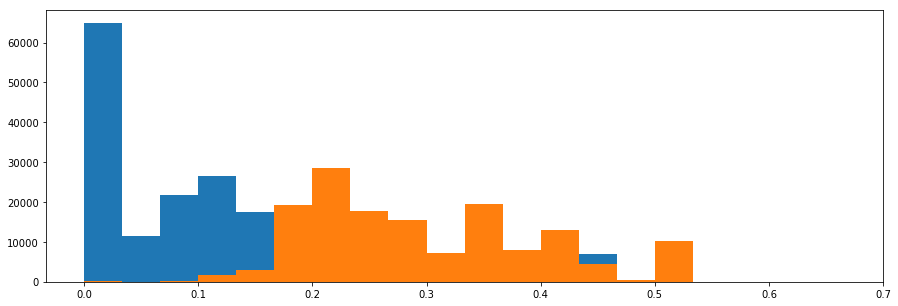

In [16]:
plt.figure(figsize=(15,5))

plt.hist(train[train['is_duplicate']==0]['R'],bins=20)

plt.hist(train[train['is_duplicate']==1]['R'],bins=20)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vect=TfidfVectorizer(stop_words='english')


In [19]:
X_train=vect.fit_transform(train)

In [20]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

In [39]:
from sklearn.cross_validation import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train.drop(['qid1', 'qid2', 'question1', 'question2', 'is_duplicate'],axis=1), train['is_duplicate'], test_size=0.2, random_state=4242)

In [41]:
dtrain = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

In [24]:
watchlist = [(dtrain, 'train'), (d_valid, 'valid')]

In [42]:
bst = xgb.train(params,dtrain)

In [49]:
test['R']=test.apply(word_match,axis=1,raw=True)

In [52]:
x_test=test.drop( ['question1', 'question2'],axis=1)

In [56]:
x_test.columns=['id','R']

In [58]:
dtest=xgb.DMatrix(x_test)

In [59]:
pred=bst.predict(dtest)

In [60]:
pred

array([ 0.42429271,  0.514386  ,  0.514386  , ...,  0.40905598,
        0.48142996,  0.514386  ], dtype=float32)

In [61]:
sub = pd.DataFrame()
sub['test_id'] = test['test_id']
sub['is_duplicate'] = pred
sub.to_csv('simple_xgb.csv', index=False)